# 🏠 House Price Prediction 💵

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 🔃 Loading and processing data

In [2]:
train_df = pd.read_csv('../data/train.csv',index_col='Id')
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
features = ['LotArea','YearBuilt','1stFlrSF','1stFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']

In [5]:
X = train_df[features]
X

,LotArea,YearBuilt,1stFlrSF,1stFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
1,8450,2003,856,856,2,3,8
2,9600,1976,1262,1262,2,3,6
3,11250,2001,920,920,2,3,6
4,9550,1915,961,961,1,3,7
5,14260,2000,1145,1145,2,4,9
...,...,...,...,...,...,...,...
1456,7917,1999,953,953,2,3,7
1457,13175,1978,2073,2073,2,3,7
1458,9042,1941,1188,1188,2,4,9


In [6]:
Y = train_df['SalePrice']
Y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)

In [8]:
print(X_train,Y_train)

      LotArea  YearBuilt  1stFlrSF  1stFlrSF  FullBath  BedroomAbvGr  \
Id                                                                     
619     11694       2007      1828      1828         2             3   
871      6600       1962       894       894         1             2   
93      13360       1921       964       964         1             2   
818     13265       2002      1689      1689         2             3   
303     13704       2001      1541      1541         2             3   
...       ...        ...       ...       ...       ...           ...   
764      9430       1999      1268      1268         2             3   
836      9600       1950      1067      1067         2             2   
1217     8930       1978      1318      1318         2             4   
560      3196       2003      1557      1557         2             2   
685     16770       1998      1195      1195         2             4   

      TotRmsAbvGrd  
Id                  
619              9  


In [9]:
print(X_test,Y_test)

      LotArea  YearBuilt  1stFlrSF  1stFlrSF  FullBath  BedroomAbvGr  \
Id                                                                     
530     32668       1957      2515      2515         3             4   
492      9490       1941       958       958         1             3   
460      7015       1950       979       979         1             3   
280     10005       1977      1156      1156         2             4   
656      1680       1971       525       525         1             3   
...       ...        ...       ...       ...       ...           ...   
327     10846       1993      1719      1719         1             1   
441     15431       2008      2402      2402         2             2   
1388     8520       1916      1664      1664         2             5   
1324     5330       1940       708       708         1             2   
62       7200       1920       581       581         1             3   

      TotRmsAbvGrd  
Id                  
530              9  


### 📖 Training

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=1)

In [12]:
dt_predict_result = dt_model.predict(X_test)

In [13]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [14]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train,Y_train)

RandomForestRegressor(random_state=1)

In [15]:
rf_predict_result = rf_model.predict(X_test)

In [16]:
gb_model = GradientBoostingRegressor(random_state=1)
gb_model.fit(X_train,Y_train)

GradientBoostingRegressor(random_state=1)

In [17]:
gb_predict_result = gb_model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [19]:
dt_mae = mean_absolute_error(Y_test, dt_predict_result)
dt_mse = mean_squared_error(Y_test, dt_predict_result)
dt_r2 = r2_score(Y_test, dt_predict_result)

In [20]:
rf_mae = mean_absolute_error(Y_test, rf_predict_result)
rf_mse = mean_squared_error(Y_test, rf_predict_result)
rf_r2 = r2_score(Y_test, rf_predict_result)

In [21]:
gb_mae = mean_absolute_error(Y_test, gb_predict_result)
gb_mse = mean_squared_error(Y_test, gb_predict_result)
gb_r2 = r2_score(Y_test, gb_predict_result)

In [22]:
print('======================================  🌳 DecisionTree Model  ==========================================')
print("Mean Absolute Error:", dt_mae )
print("Mean Squared Error:", dt_mse)
print("R2 Score:", dt_r2)

======================================  🌳 DecisionTree Model  ==========================================
Mean Absolute Error: 36273.69863013698
Mean Squared Error: 3266161491.4589043
R2 Score: 0.5270442438680791


In [23]:
print('======================================  🌳🌳🌳 RandomForest Model  ==========================================')
print("Mean Absolute Error:", rf_mae)
print("Mean Squared Error:", rf_mse)
print("R2 Score:", rf_r2)

======================================  🌳🌳🌳 RandomForest Model  ==========================================
Mean Absolute Error: 25921.291816210047
Mean Squared Error: 1582663784.265275
R2 Score: 0.770822738328397


In [24]:
print('======================================  🔍 Gradient Boosting Model  ==========================================')
print("Mean Absolute Error:", gb_mae)
print("Mean Squared Error:", gb_mse)
print("R2 Score:", gb_r2)

======================================  🔍 Gradient Boosting Model  ==========================================
Mean Absolute Error: 26700.32488617761
Mean Squared Error: 1620754545.960907
R2 Score: 0.7653070144284893


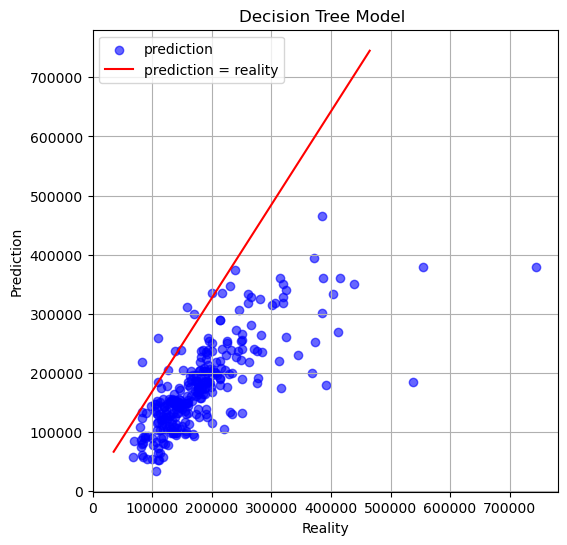

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test,dt_predict_result,alpha=0.6,color = 'b',label = 'prediction')
plt.plot([min(dt_predict_result), max(dt_predict_result)], [min(Y_test), max(Y_test)], color='red', label='prediction = reality')
plt.xlabel('Reality')
plt.ylabel('Prediction')
plt.title('Decision Tree Model ')
plt.legend()
plt.grid(True)


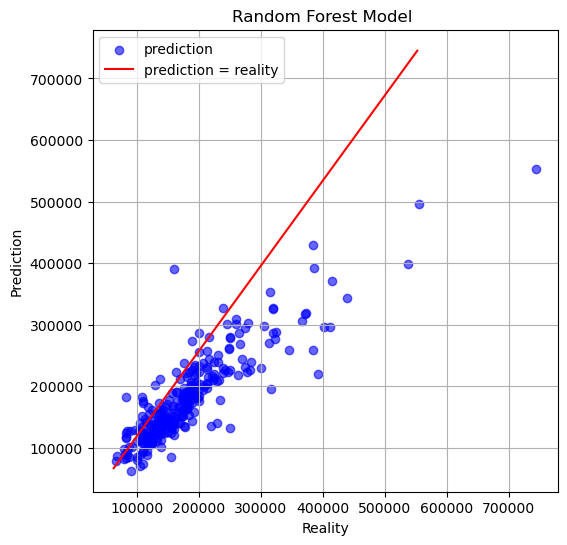

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test,rf_predict_result,alpha=0.6,color = 'b',label = 'prediction')
plt.plot([min(rf_predict_result), max(rf_predict_result)], [min(Y_test), max(Y_test)], color='red', label='prediction = reality')
plt.xlabel('Reality')
plt.ylabel('Prediction')
plt.title('Random Forest Model ')
plt.legend()
plt.grid(True)

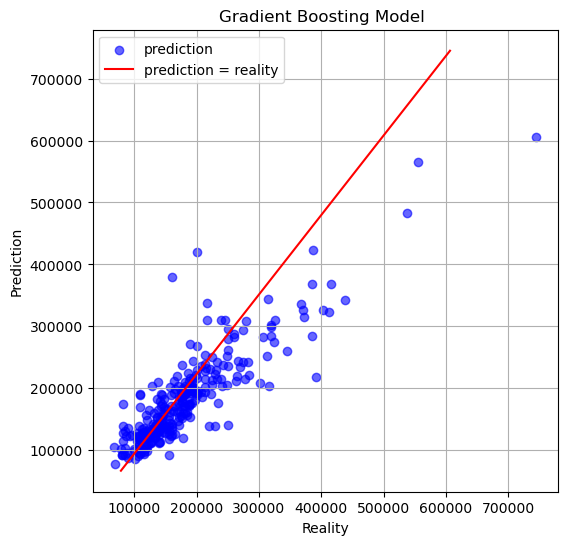

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test,gb_predict_result,alpha=0.6,color = 'b',label = 'prediction')
plt.plot([min(gb_predict_result), max(gb_predict_result)], [min(Y_test), max(Y_test)], color='red', label='prediction = reality')
plt.xlabel('Reality')
plt.ylabel('Prediction')
plt.title('Gradient Boosting Model ')
plt.legend()
plt.grid(True)